In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [31]:
dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

datetime.datetime(2017, 8, 23, 0, 0)

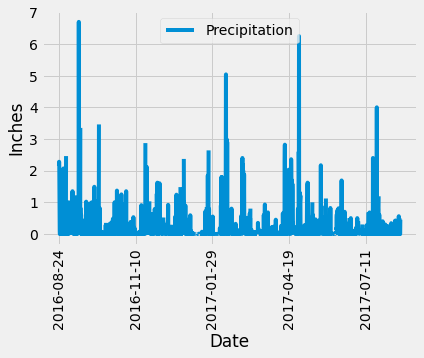

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
day_1year = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days = 365)
day_1year

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >=day_1year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_scores, columns=["Date", "Precipitation"]).set_index("Date")
prcp_scores_df
# Sort the dataframe by date
prcp_scores_df = prcp_scores_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_df.plot()
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()


In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()[0][0]

9

In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations                                                                                                                           

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station ==active_stations[0][0]).all()[0]

(54.0, 85.0, 71.66378066378067)

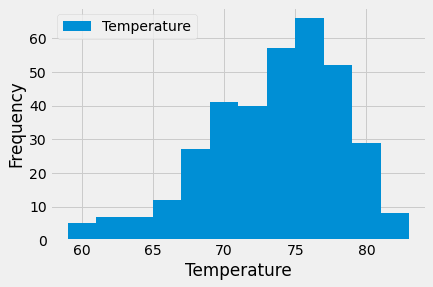

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_1year = session.query(measurement.tobs).filter(measurement.date >=day_1year).filter(measurement.station ==active_stations[0][0]).all()
tobs_1year_df = pd.DataFrame(tobs_1year,columns = ["Temperature"])
tobs_1year_df.plot(kind="hist",bins=12)
plt.xlabel("Temperature")
plt.show()

# Close session

In [38]:
# Close Session
session.close()